In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv


In [2]:
dataset=pd.read_csv('../input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv')
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
# First finding the mean of a column to fill na values with it
mean=dataset['education'].mean()
dataset['education']=dataset['education'].fillna(mean)

In [6]:
dataset.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
mean=dataset['cigsPerDay'].mean()
dataset['cigsPerDay']=dataset['cigsPerDay'].fillna(mean)

In [8]:
mean=dataset['BPMeds'].mean()
dataset['BPMeds']=dataset['BPMeds'].fillna(mean)

In [9]:
mean=dataset['glucose'].mean()
dataset['glucose']=dataset['glucose'].fillna(mean)

In [10]:
mean=dataset['totChol'].mean()
dataset['totChol']=dataset['totChol'].fillna(mean)

In [11]:
mean=dataset['BMI'].mean()
dataset['BMI']=dataset['BMI'].fillna(mean)

In [12]:
mean=dataset['heartRate'].mean()
dataset['heartRate']=dataset['heartRate'].fillna(mean)

In [13]:
# Importing the train test 
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(dataset.drop("TenYearCHD",axis=1),dataset['TenYearCHD'],test_size=0.33,random_state=10)

In [15]:
x_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
947,0,43,4.0,0,0.0,0.0,0,0,0,229.0,118.0,77.0,25.32,78.0,103.0
2076,1,64,2.0,0,0.0,0.0,0,0,0,287.0,121.0,70.0,23.64,68.0,75.0
106,0,42,4.0,0,0.0,0.0,0,0,0,250.0,115.0,79.0,26.93,65.0,79.0
2972,0,51,1.0,1,15.0,0.0,0,0,0,352.0,136.5,87.0,25.79,73.0,67.0
3955,1,59,1.0,0,0.0,0.0,0,1,0,313.0,150.0,82.0,27.27,62.0,94.0


In [16]:
y_train.head()

947     0
2076    0
106     0
2972    0
3955    0
Name: TenYearCHD, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(solver='liblinear',random_state=1)

In [18]:
reg.fit(x_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [19]:
predict=reg.predict(x_test)

In [20]:
print(predict)

[0 0 0 ... 0 0 0]


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(predict,y_test)

0.8506075768406004

In [23]:
dataset.shape

(4238, 16)

<Figure size 288x288 with 0 Axes>

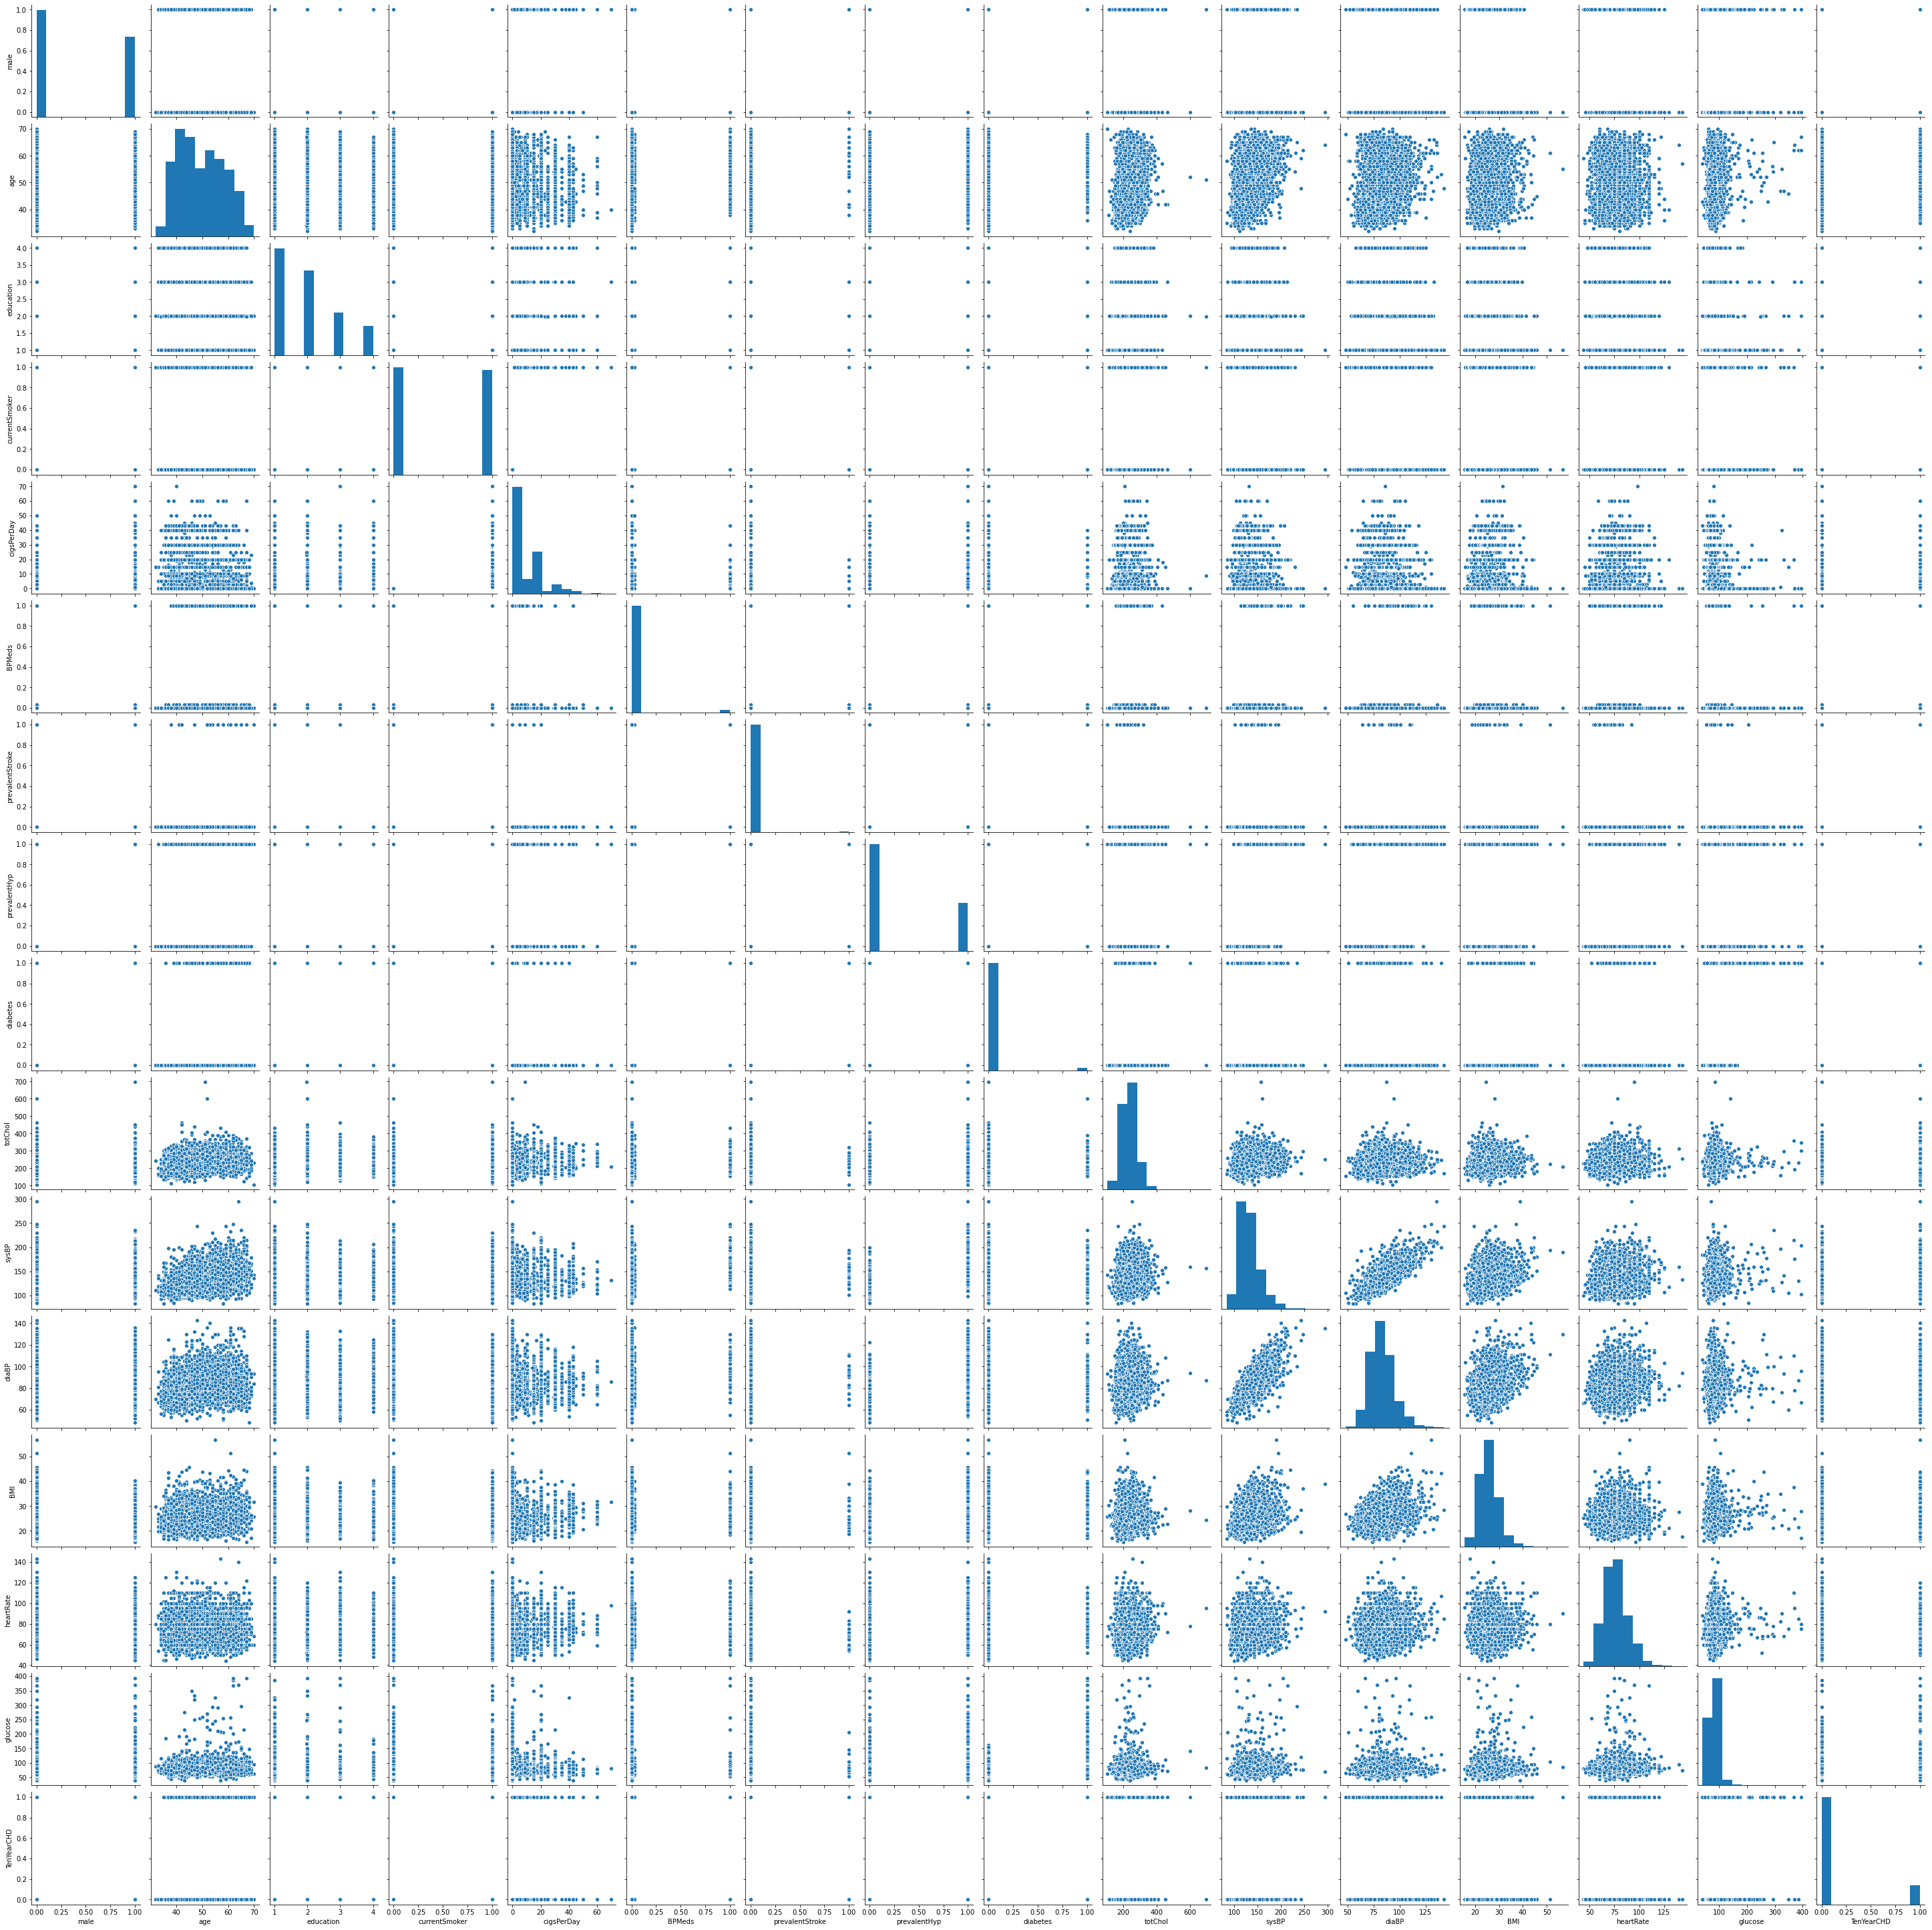

In [24]:
# ?Visualizing the result
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
sns.pairplot(dataset)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(predict,y_test)

array([[1177,  199],
       [  10,   13]])

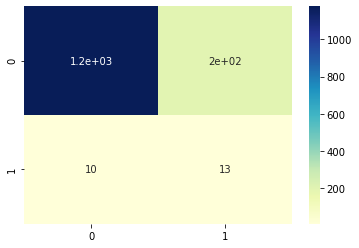

In [27]:
sns.heatmap(confusion_matrix(predict,y_test),annot=True,cmap='YlGnBu')